In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import filt_freq, RMS

In [23]:
fs, data_2209_pgd = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1833/MIC1.WAV')
fs, data_2209_micr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1833/MIC2.WAV')
fs, data_2209_micr_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1847/MIC2.WAV')
fs, data_2209_gen = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1851/MIC1.WAV')

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6495/2096005864.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_pgd = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1833/MIC1.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6495/2096005864.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_micr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1833/MIC2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6495/2096005864.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_micr_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1847/MIC2.WAV')
/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_6495/2096005864.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data_2209_gen = wavfile

In [24]:
octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


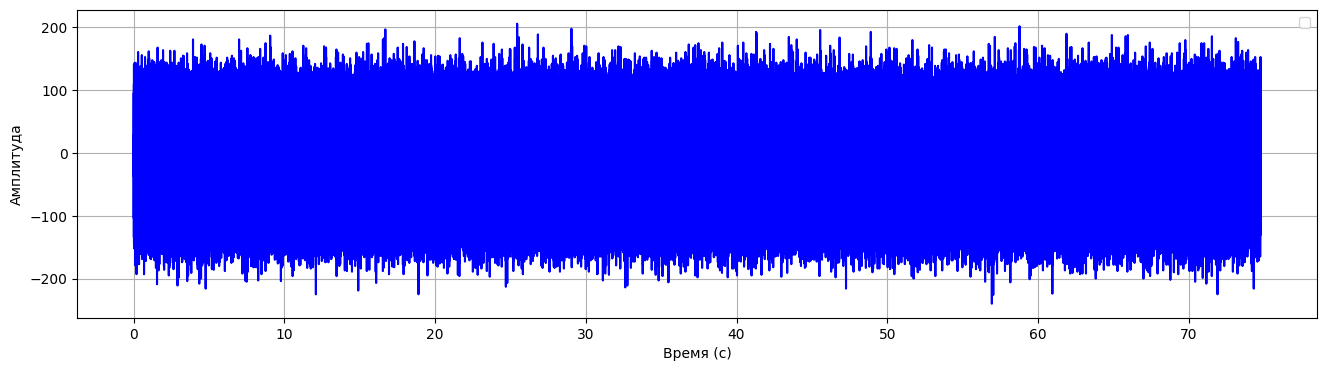

In [25]:
t_pgd = np.arange(len(data_2209_pgd))/fs
f_pgd = fftfreq(len(data_2209_pgd), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_pgd, data_2209_pgd, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


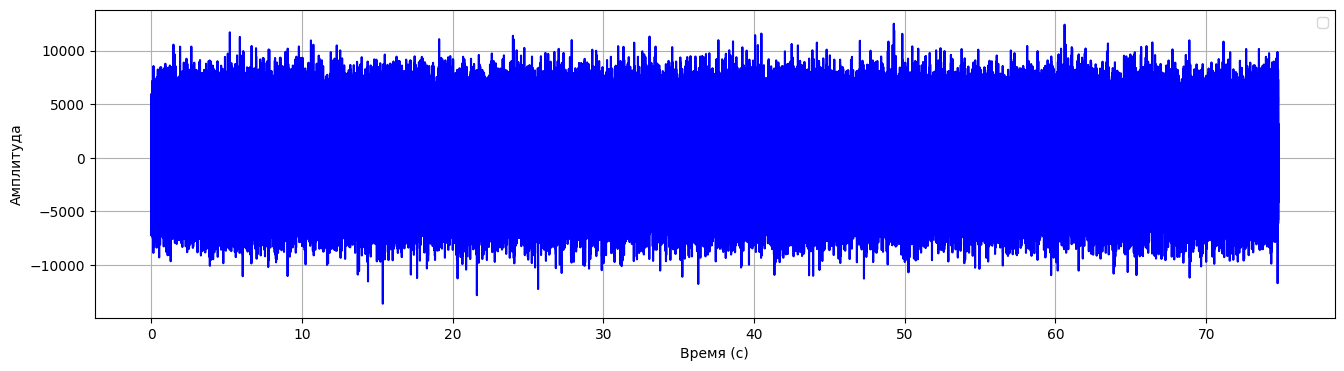

In [26]:
t_micr = np.arange(len(data_2209_micr))/fs
f_micr = fftfreq(len(data_2209_micr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr, data_2209_micr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


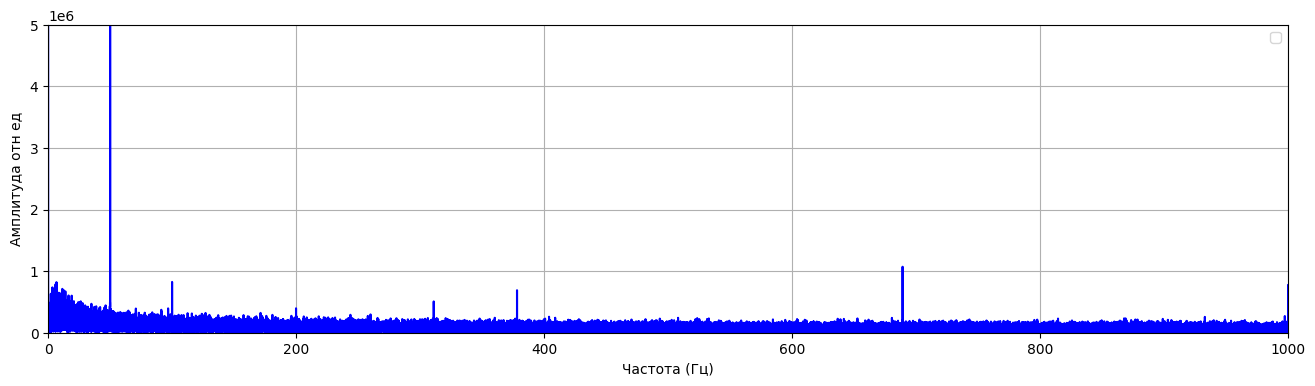

In [28]:
plt.figure(figsize=(16,4))
plt.plot(f_pgd, np.abs(fft(data_2209_pgd)), color='blue')
plt.legend()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда отн ед")
plt.grid(True)
plt.xlim(0, 1000)
plt.ylim(0, 0.5e7)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


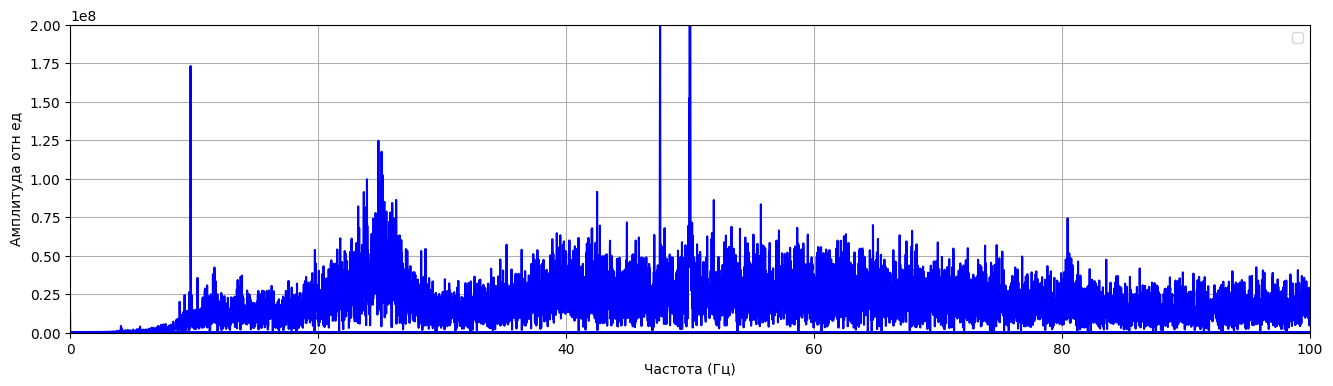

In [30]:
plt.figure(figsize=(16,4))
plt.plot(f_micr, np.abs(fft(data_2209_micr)), color='blue')
plt.legend()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда отн ед")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 2e8)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


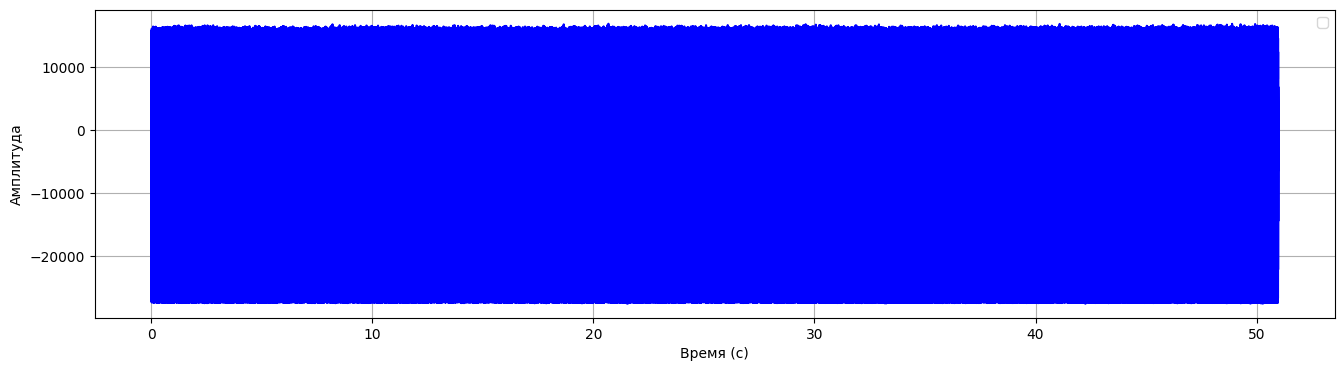

In [31]:
t_micr_calibr = np.arange(len(data_2209_micr_calibr))/fs
f_micr_calibr = fftfreq(len(data_2209_micr_calibr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr_calibr, data_2209_micr_calibr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


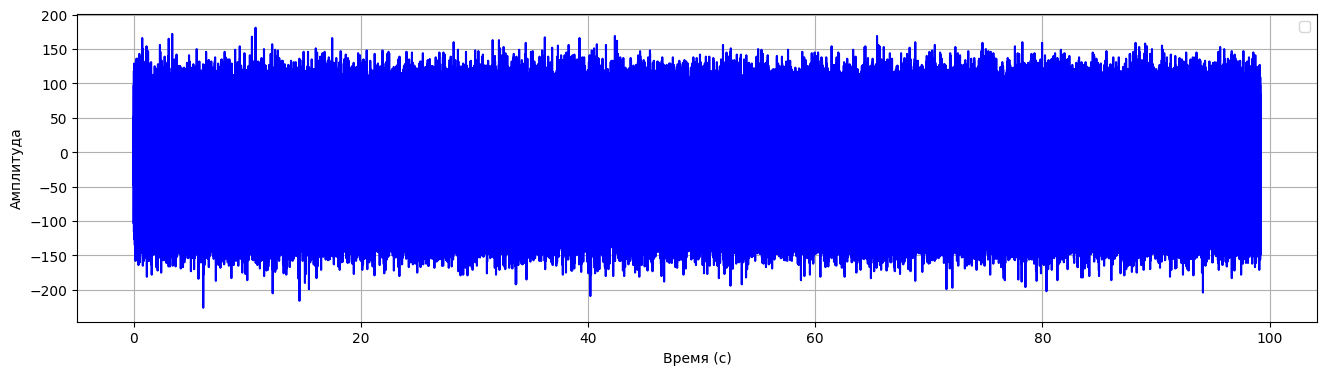

In [32]:

t_gen = np.arange(len(data_2209_gen))/fs
f_gen = fftfreq(len(data_2209_gen), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_gen, data_2209_gen, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [33]:
t_index = (t_micr_calibr > 10) & (t_micr_calibr < 20)
t_1000Hz = t_micr_calibr[t_index]

data_2209_micr_calibr_1000Hz = data_2209_micr_calibr[t_index]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


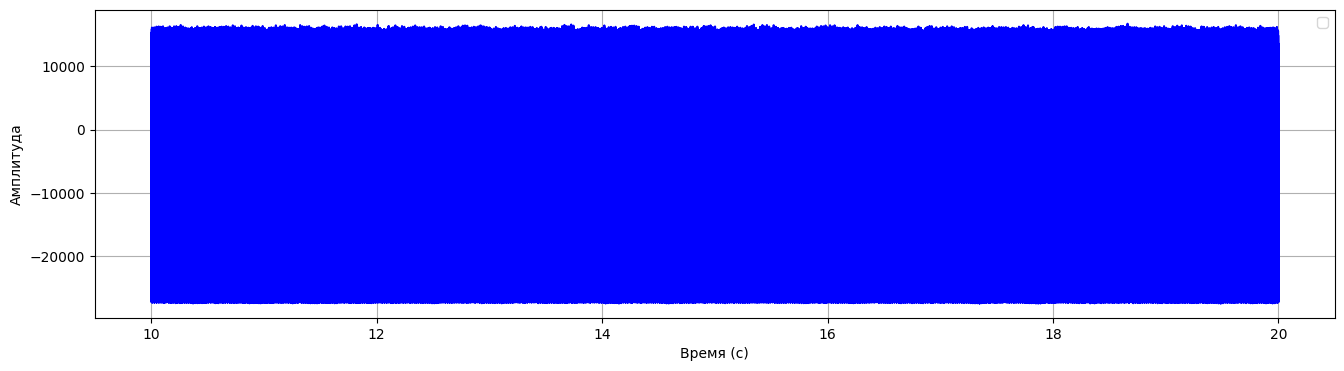

In [34]:
plt.figure(figsize=(16,4))
plt.plot(t_1000Hz, data_2209_micr_calibr_1000Hz, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [35]:
data_2209_micr_calibr_1000Hz_filt = ifft((fft(data_2209_micr_calibr_1000Hz)))
k_shum = 10**(2)
k_t = RMS(data_2209_micr_calibr_1000Hz_filt) / k_shum
k = 1 / k_t
k

0.007645928259229979

In [36]:
data_2209_micr_pa = data_2209_micr / k_shum
data_2209_micr_pa = data_2209_micr_pa * k

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


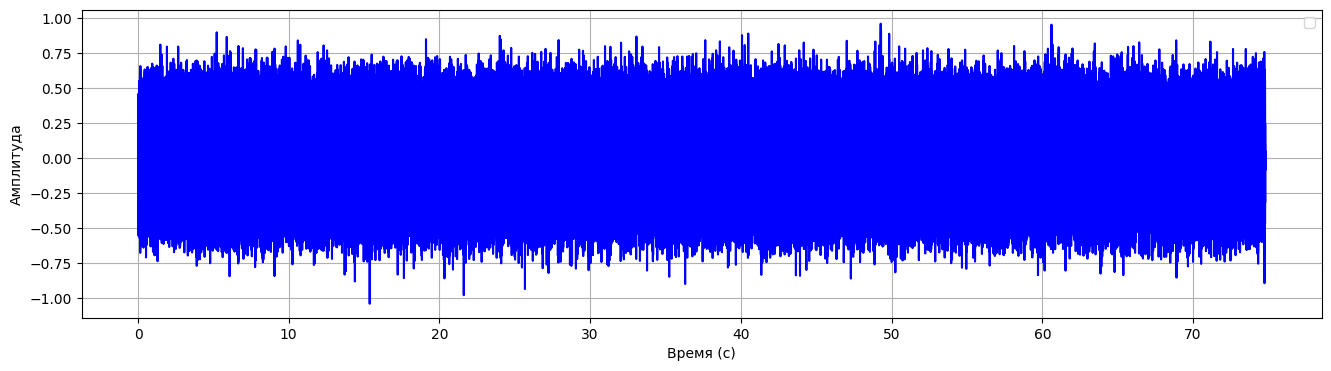

In [37]:
t_pgd = np.arange(len(data_2209_micr_pa))/fs
f_pgd = fftfreq(len(data_2209_micr_pa), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_pgd,(data_2209_micr_pa), color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
# plt.xlim(0, 100)
plt.show()

In [38]:
data_2209_micr_pa_rms = RMS(data_2209_micr_pa)
dB_level = 20 * np.log10(data_2209_micr_pa_rms / 2e-5)

In [39]:
dB_level

79.64793046925378

In [40]:
RMS_gen = RMS(data_2209_gen)
mv_gen = 134
rel_to_mv = mv_gen / RMS_gen
data_2209_pgd_mv = data_2209_pgd * rel_to_mv

In [41]:
amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_1_filt = ifft(filt_freq(fft(data_2209_micr_pa), f1, f2, fs))
    amp = RMS(data_1_filt)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_2_filt = ifft(filt_freq(fft(data_2209_pgd_mv), f1, f2, fs))
    amp = RMS(data_2_filt)
    amplitudes_PGD.append(amp)


amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)
calibration_coef = amplitudes_microphone / amplitudes_PGD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


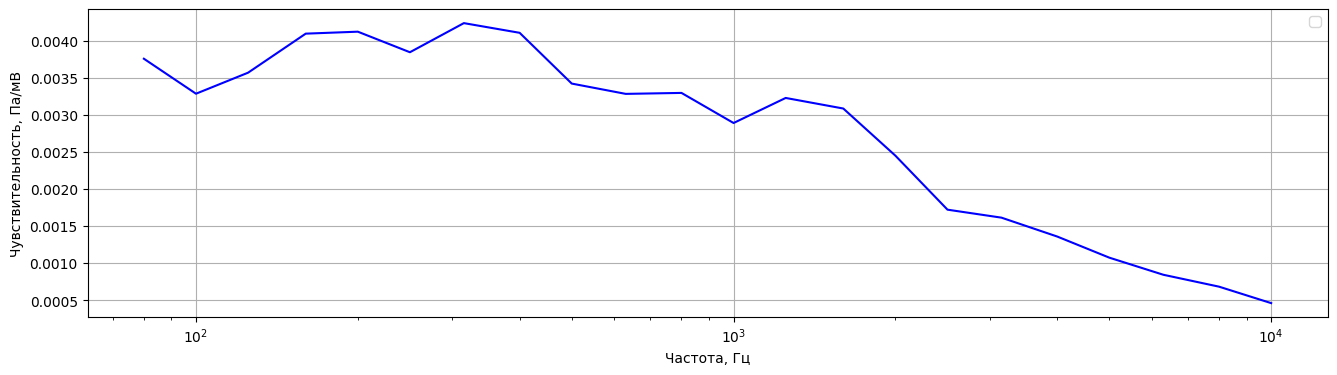

In [47]:

plt.figure(figsize=(16,4))
plt.plot((center_freqs),calibration_coef, color='blue')
plt.legend()
plt.xlabel("Частота, Гц")
plt.ylabel("Чувствительность, Па/мВ")
plt.grid(True)
plt.xscale('log')
# plt.xlim(0, 100)
plt.show()
